# LOAD DATA

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Data Train.csv")

# EDA

In [4]:
df.head(5)

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
df.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

In [7]:
#cek korelasi
df.corr()

account_length  number_vmail_messages  \
account_length                       1.000000              -0.006626   
number_vmail_messages               -0.006626               1.000000   
total_day_minutes                   -0.001612               0.002000   
total_day_calls                      0.023002              -0.006920   
total_day_charge                    -0.001613               0.001994   
total_eve_minutes                   -0.010326               0.010725   
total_eve_calls                      0.005535               0.003593   
total_eve_charge                    -0.010322               0.010736   
total_night_minutes                 -0.009916               0.018308   
total_night_calls                   -0.001846               0.001977   
total_night_charge                  -0.009942               0.018300   
total_intl_minutes                   0.004539               0.005220   
total_intl_calls                     0.013690               0.006585   
total_intl_charge                    0.004494               0.005249   
number_customer_service_calls        0.001002              -0.015303   

                               total_day_minutes  total_day_calls  \
account_length                         -0.001612         0.023002   
number_vmail_messages                   0.002000        -0.006920   
total_day_minutes                       1.000000         0.000747   
total_day_calls                         0.000747         1.000000   
total_day_charge                        1.000000         0.000751   
total_eve_minutes                      -0.013248         0.008661   
total_eve_calls                         0.005986         0.003739   
total_eve_charge                       -0.013258         0.008663   
total_night_minutes                     0.010049         0.002206   
total_night_calls                      -0.004812        -0.004815   
total_night_charge                      0.010036         0.002200   
total_intl_minutes                     -0.021369         0.008834   
total_intl_calls                        0.003859         0.009377   
total_intl_charge                      -0.021291         0.008909   
number_customer_service_calls          -0.002925        -0.015845   

                               total_day_charge  total_eve_minutes  \
account_length                        -0.001613          -0.010326   
number_vmail_messages                  0.001994           0.010725   
total_day_minutes                      1.000000          -0.013248   
total_day_calls                        0.000751           0.008661   
total_day_charge                       1.000000          -0.013247   
total_eve_minutes                     -0.013247           1.000000   
total_eve_calls                        0.005985           0.003101   
total_eve_charge                      -0.013257           1.000000   
total_night_minutes                    0.010053          -0.014018   
total_night_calls                     -0.004816           0.011973   
total_night_charge                     0.010040          -0.014031   
total_intl_minutes                    -0.021374          -0.003509   
total_intl_calls                       0.003853           0.012239   
total_intl_charge                     -0.021296          -0.003460   
number_customer_service_calls         -0.002932          -0.010063   

                               total_eve_calls  total_eve_charge  \
account_length                        0.005535         -0.010322   
number_vmail_messages                 0.003593          0.010736   
total_day_minutes                     0.005986         -0.013258   
total_day_calls                       0.003739          0.008663   
total_day_charge                      0.005985         -0.013257   
total_eve_minutes                     0.003101          1.000000   
total_eve_calls                       1.000000          0.003120   
total_eve_charge                      0.003120          1.000000   
total_night_minutes                   0.

<Axes: >

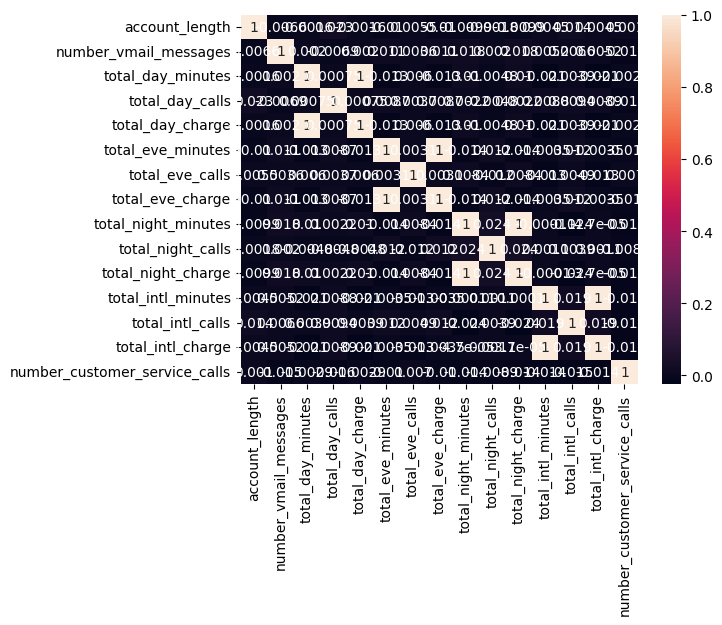

In [23]:
sns.heatmap(df.corr(), annot=True)

In [8]:
# Menampilkan distribusi unique value

for col in df.select_dtypes(include='object').columns:
    print(f'Column: {col}')
    print(df[col].value_counts())
    print()

Column: state
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

Column: area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

Column: international_plan
no     3854
yes     396
Name: international_plan, dtype: int64

Column: voice_mail_plan
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

Column: churn
no     3652
yes     598
Name: churn, dtype: int64



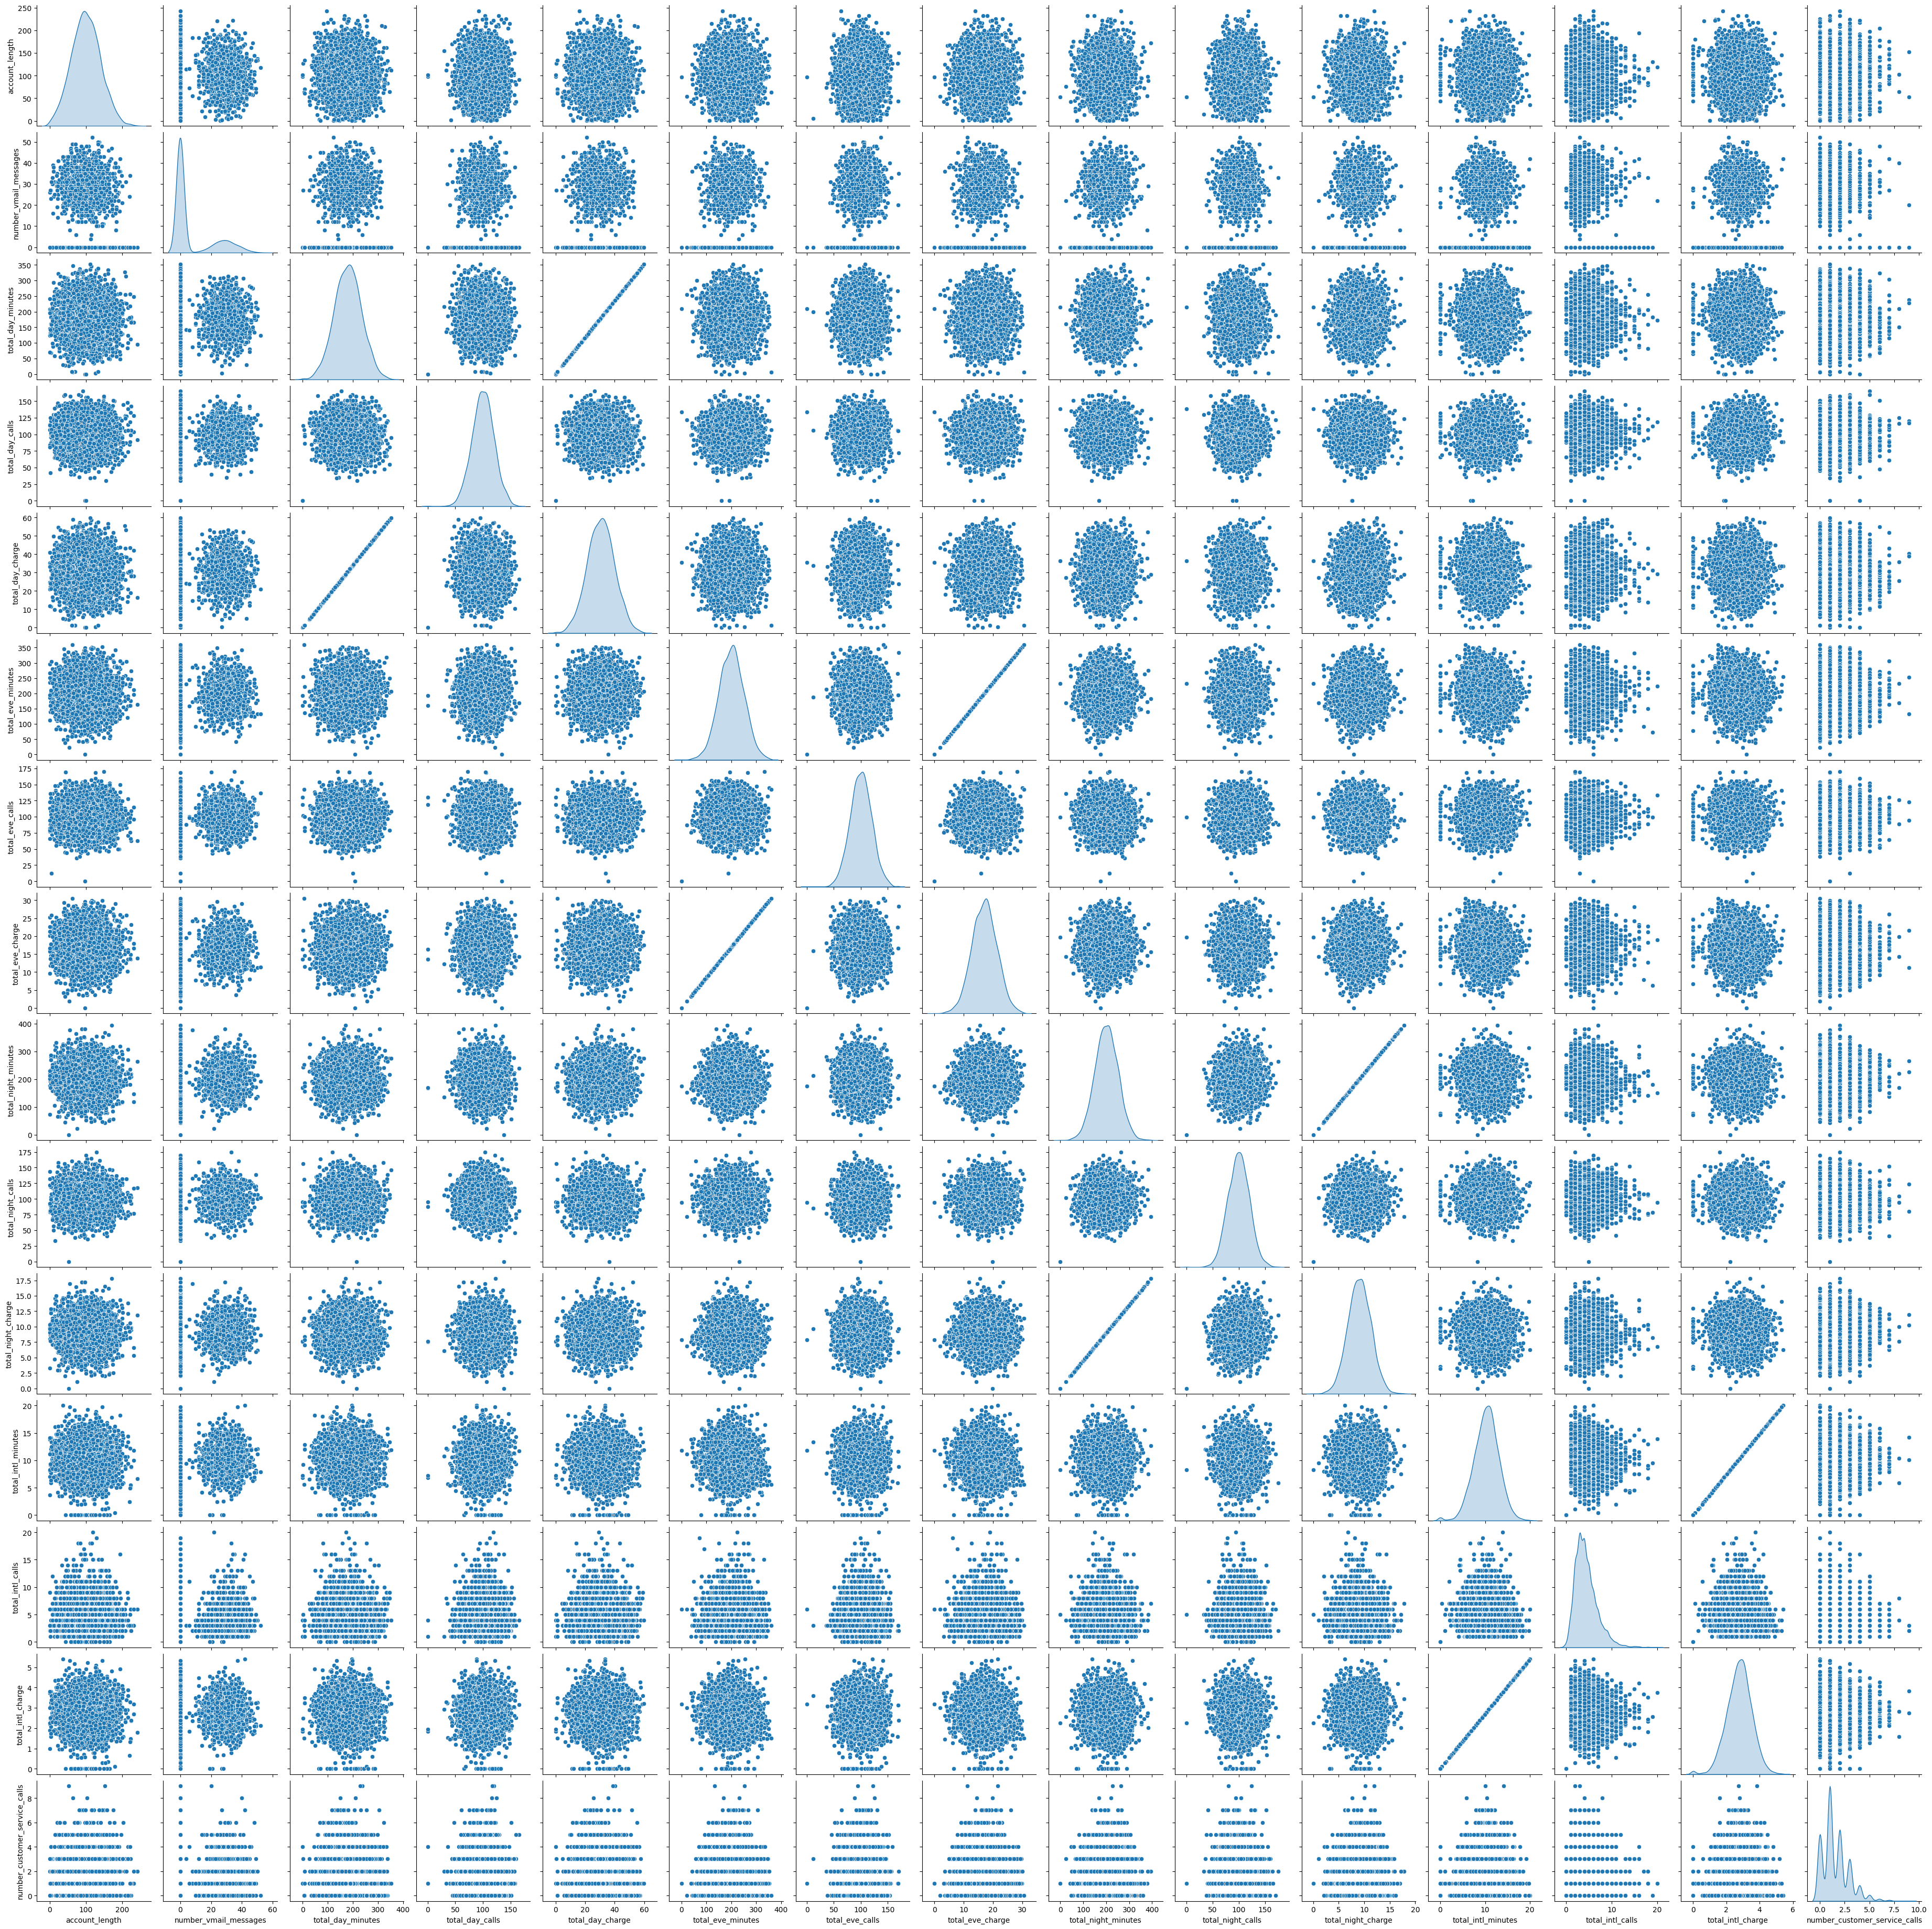

In [9]:
sns.pairplot(df, diag_kind = 'kde')

Missing Value

In [10]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Data Duplikat

In [11]:
df.duplicated().sum()

0

Outlier

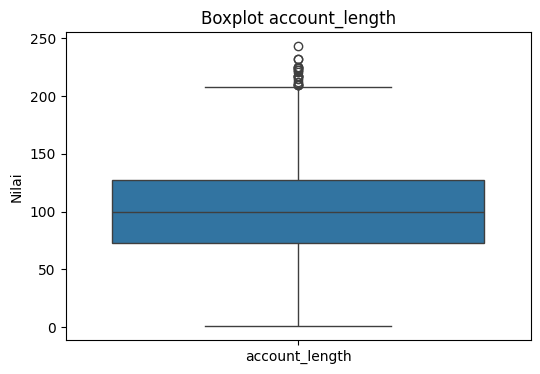

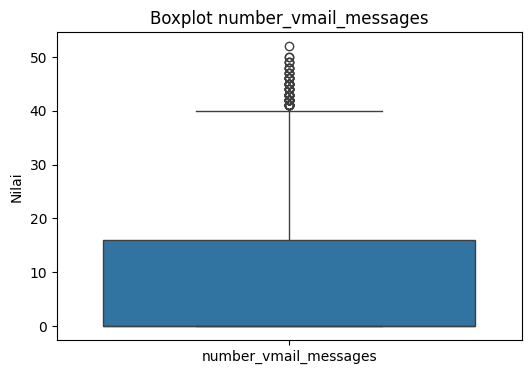

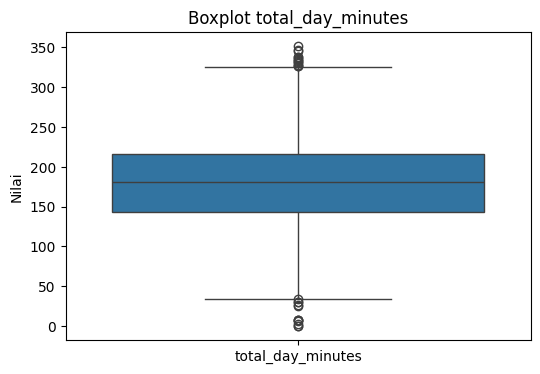

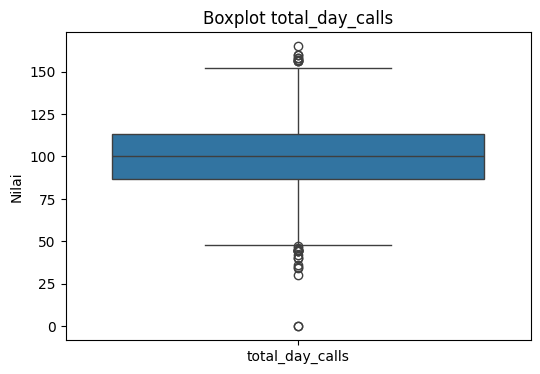

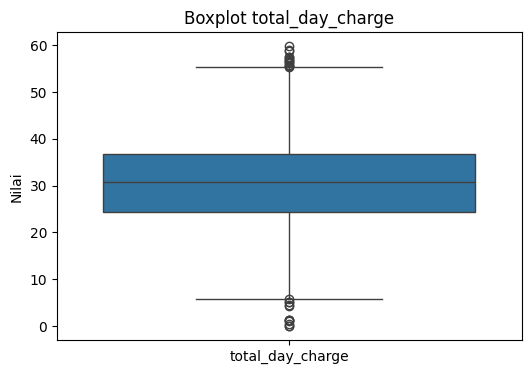

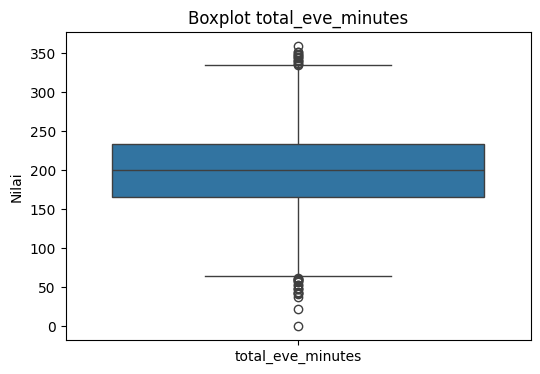

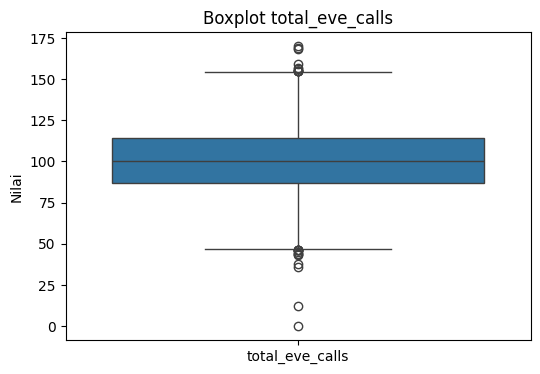

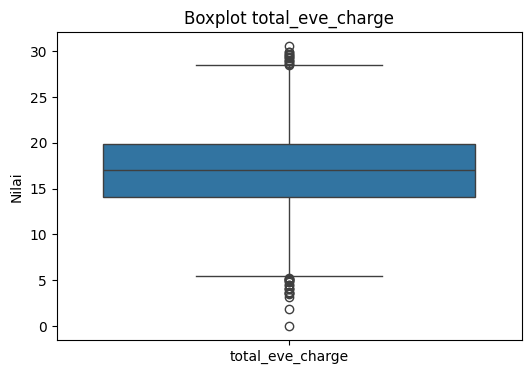

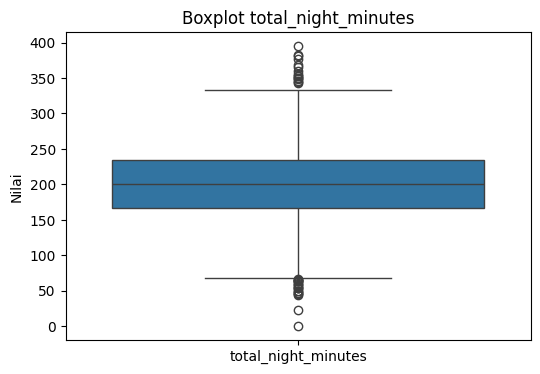

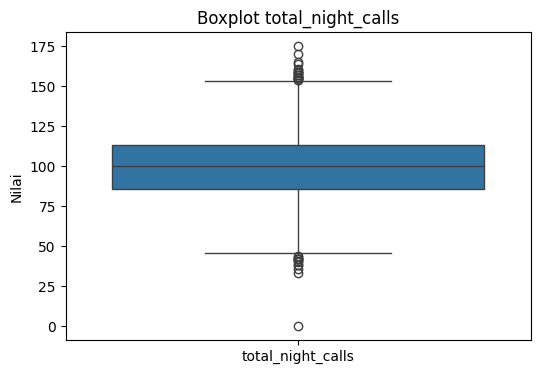

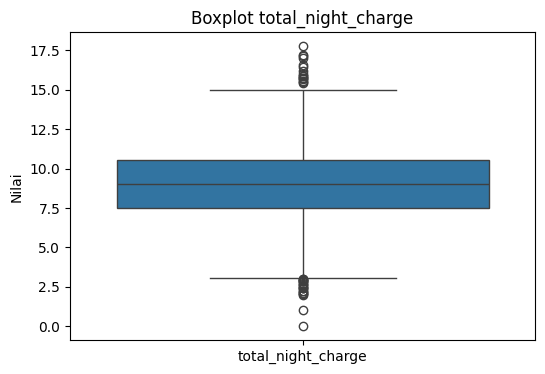

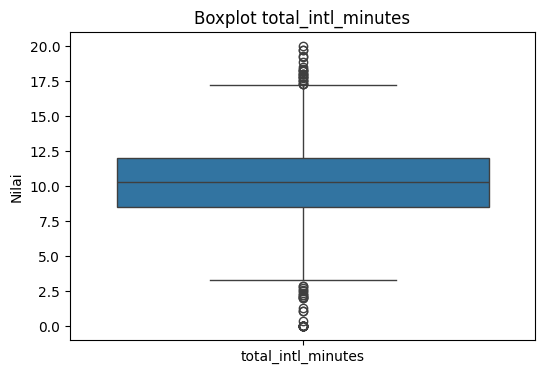

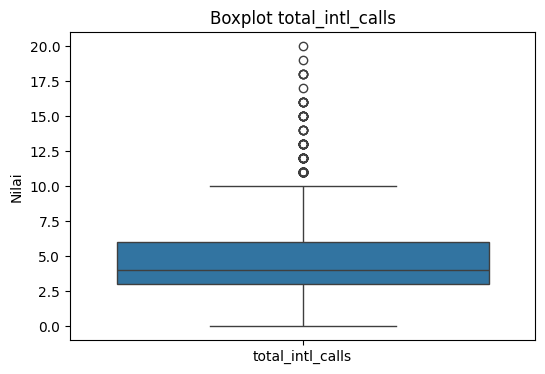

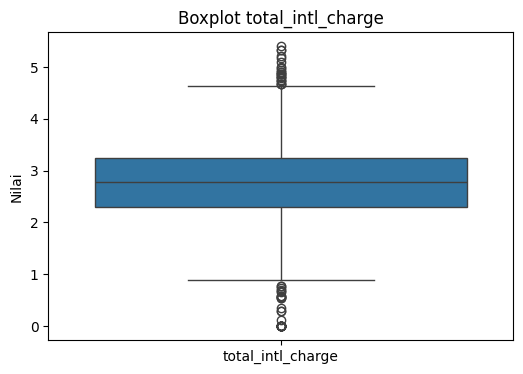

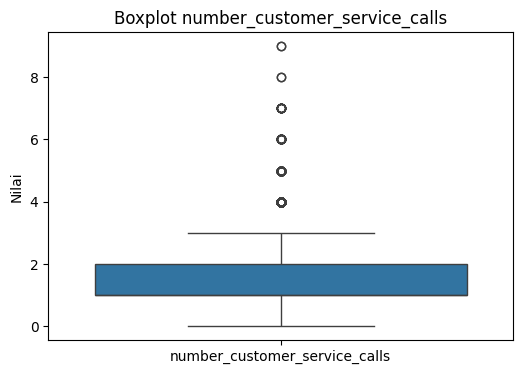

In [12]:
# List kolom yang ditampilkan boxplot
kolom = ['account_length', 'number_vmail_messages', 'total_day_minutes',
 'total_day_calls', 'total_day_charge', 'total_eve_minutes',
 'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

# Iterasi melalui setiap kolom dan membuat plot terpisah
for col in kolom:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[[col]], orient='v')
    plt.xlabel('')
    plt.ylabel('Nilai')
    plt.title(f'Boxplot {col}')
    plt.show()

In [13]:
col = ['account_length', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
 'total_day_calls', 'total_day_charge', 'total_eve_minutes',
 'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn']
df = df[col]
df.to_csv('for_model.csv', index=False)

One-Hot Encoding

In [15]:
df1 = pd.read_csv("for_model.csv")
# Melakukan one-hot encoding pada kolom-kolom yang telah dilabeli sebelumnya
df1 = pd.get_dummies(df1, columns=['international_plan', 'voice_mail_plan', 'churn'])

# Tampilkan hasil
print(df1.head())

   account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0             107                     26              161.6              123   
1             137                      0              243.4              114   
2              84                      0              299.4               71   
3              75                      0              166.7              113   
4             121                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  ...  total_in

In [16]:
df1.head()

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0             107                     26              161.6              123   
1             137                      0              243.4              114   
2              84                      0              299.4               71   
3              75                      0              166.7              113   
4             121                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  ...  total_intl_minutes  \
0                254.4                103  ...                13.7   
1                162.6                104  ...                12.2   
2                196.9                 89  ...                 6.6   
3                186.9                121  ...                10.1   
4                212.6                118  ...                 7.5   

   total_intl_calls  total_intl_charge  number_customer_service_calls  \
0                 3               3.70                              1   
1                 5               3.29                              0   
2                 7               1.78                              2   
3                 3               2.73                              3   
4                 7               2.03                              3   

   international_plan_no  international_plan_yes  voice_mail_plan_no  \
0                      1                       0                   0   
1                      1                       0                   1   
2                      0                       1                   1   
3                      0                       1                   1   
4                      1                       0                   0   

   voice_mail_plan_yes  churn_no  churn_yes  
0                    1         1          0  
1                    0         1          0  
2                    0         1          0  
3                    0         1          0  
4                    1         1          0  

[5 rows x 21 columns]

In [17]:
# Menampilkan nama kolom dalam bentuk array
kolom_array = df1.columns.to_numpy()

# Menampilkan array nama kolom
print(kolom_array)

['account_length' 'number_vmail_messages' 'total_day_minutes'
 'total_day_calls' 'total_day_charge' 'total_eve_minutes'
 'total_eve_calls' 'total_eve_charge' 'total_night_minutes'
 'total_night_calls' 'total_night_charge' 'total_intl_minutes'
 'total_intl_calls' 'total_intl_charge' 'number_customer_service_calls'
 'international_plan_no' 'international_plan_yes' 'voice_mail_plan_no'
 'voice_mail_plan_yes' 'churn_no' 'churn_yes']


# DATA PREPROCESSING

Menangani Outliers

In [18]:
from scipy import stats

print (f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True]* len (df1))
for col in ['account_length', 'number_vmail_messages', 'total_day_minutes',
 'total_day_calls', 'total_day_charge', 'total_eve_minutes',
 'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']:
  zscore = abs(stats.zscore (df1[col]))
  filtered_entries = (zscore < 3) & filtered_entries

df1=df1[filtered_entries]

print (f'Jumlah baris setelah memfilter outlier: {len (df1)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 4031


Standarisasi dan Normalisasi

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df1['account_length'] = MinMaxScaler().fit_transform(df1['account_length'].values.reshape(len(df1), 1))
df1['number_vmail_messages'] = MinMaxScaler().fit_transform(df1['number_vmail_messages'].values.reshape(len(df1), 1))
df1['total_day_minutes'] = MinMaxScaler().fit_transform(df1['total_day_minutes'].values.reshape(len(df1), 1))
df1['total_day_calls'] = MinMaxScaler().fit_transform(df1['total_day_calls'].values.reshape(len(df1), 1))
df1['total_day_charge'] = MinMaxScaler().fit_transform(df1['total_day_charge'].values.reshape(len(df1), 1))
df1['total_eve_minutes'] = MinMaxScaler().fit_transform(df1['total_eve_minutes'].values.reshape(len(df1), 1))
df1['total_eve_calls'] = MinMaxScaler().fit_transform(df1['total_eve_calls'].values.reshape(len(df1), 1))
df1['total_eve_charge'] = MinMaxScaler().fit_transform(df1['total_eve_charge'].values.reshape(len(df1), 1))
df1['total_night_minutes'] = MinMaxScaler().fit_transform(df1['total_night_minutes'].values.reshape(len(df1), 1))
df1['total_night_calls'] = MinMaxScaler().fit_transform(df1['total_night_calls'].values.reshape(len(df1), 1))
df1['total_night_charge'] = MinMaxScaler().fit_transform(df1['total_night_charge'].values.reshape(len(df1), 1))
df1['total_intl_minutes'] = MinMaxScaler().fit_transform(df1['total_intl_minutes'].values.reshape(len(df1), 1))
df1['total_intl_calls'] = MinMaxScaler().fit_transform(df1['total_intl_calls'].values.reshape(len(df1), 1))
df1['total_intl_charge'] = MinMaxScaler().fit_transform(df1['total_intl_charge'].values.reshape(len(df1), 1))
df1['number_customer_service_calls'] = MinMaxScaler().fit_transform(df1['number_customer_service_calls'].values.reshape(len(df1), 1))

# KLASIFIKASI

In [ ]:
!pip3 install catboost


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score


In [21]:
# Membuat variabel X dan y
X = df1.drop(['churn_yes', 'churn_no'], axis=1)
y_encoded = df1[['churn_yes', 'churn_no']]  # Variabel target yang sudah di-encode dengan one-hot encoding

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# --------- RANDOM FOREST ----------
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_clf_rf = clf_rf.predict(X_test)
recall_rf = recall_score(y_test, y_pred_clf_rf, average='weighted')
print("Recall Random Forest:", recall_rf)

# --------- KNN ----------
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_clf_knn = clf_knn.predict(X_test)
recall_knn = recall_score(y_test, y_pred_clf_knn, average='weighted')
print("Recall KNN:", recall_knn)

# --------- DECISION TREE ----------
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_clf_dt = clf_dt.predict(X_test)
recall_dt = recall_score(y_test, y_pred_clf_dt, average='weighted')
print("Recall Decision Tree:", recall_dt)

# --------- XG BOOST ----------
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
y_pred_clf_xgb = clf_xgb.predict(X_test)
recall_xgb = recall_score(y_test, y_pred_clf_xgb, average='weighted')
print("Recall XG Boost:", recall_xgb)

Recall Random Forest: 0.9591078066914498
Recall KNN: 0.9144981412639405
Recall Decision Tree: 0.8983890954151177
Recall XG Boost: 0.9615861214374225
